In [8]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline



(540, 2500) (540,)


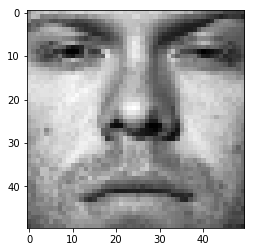

In [23]:
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

In [127]:
test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

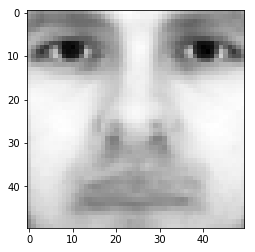

In [29]:
u = sum(train_data)/len(train_data)#c
plt.imshow(u.reshape(50,50), cmap = cm.Greys_r)
plt.show()

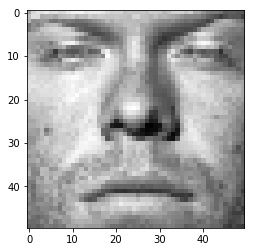

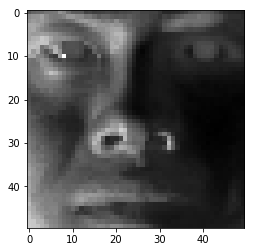

In [44]:
train_data_sub = train_data - u#d
test_data_sub = test_data - u

plt.imshow(train_data_sub[10].reshape(50,50), cmap = cm.Greys_r)
plt.show()
plt.imshow(test_data_sub[10].reshape(50,50), cmap = cm.Greys_r)
plt.show()


In [31]:
U, s, V = np.linalg.svd(train_data, full_matrices=True)

In [90]:
s = np.diag(s)

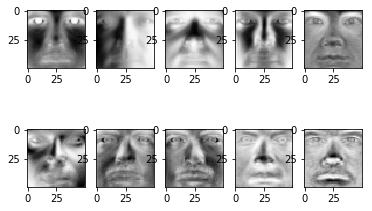

In [59]:

for i in range(10):#e
    plt.subplot(2,5,i+1)
    plt.imshow(V[i].reshape(50,50), cmap = cm.Greys_r)
plt.show()    

In [105]:
rank_error = []
r_range = []
for r in range(200):
    r_range.append(r+1)
    rank_error.append(np.sum((train_data-np.dot(np.dot(U[:,:r], s[:r,:r]),  V[:r,:]))**2))

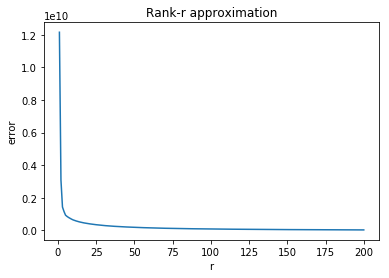

In [106]:
plt.plot(r_range, rank_error)#f
plt.title('Rank-r approximation')
plt.xlabel('r')
plt.ylabel('error')
plt.show()

In [112]:
def build_r_feature_matrix(x, v, r):#g
    return np.dot(x, v[:r,:].transpose())    

In [113]:
train_feature = build_r_feature_matrix(train_data, V, 10)
test_feature = build_r_feature_matrix(test_data, V, 10)

In [128]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

classif = OneVsRestClassifier(LogisticRegression())
classif.fit(train_feature,train_labels)
test_labels_predict = classif.predict(test_feature)

In [130]:
sum(test_labels == test_labels_predict)/len(test_labels_predict)#h accuracy

0.82999999999999996

In [132]:
accuracy = []
r_range_h = []
for i in range(200):
    train_feature = build_r_feature_matrix(train_data, V, i+1)
    test_feature = build_r_feature_matrix(test_data, V, i+1)
    classif = OneVsRestClassifier(LogisticRegression())
    classif.fit(train_feature,train_labels)
    accuracy.append(sum(test_labels == classif.predict(test_feature))/len(test_labels))
    r_range_h.append(i+1)

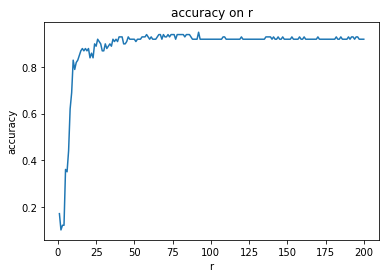

In [133]:
plt.plot(r_range_h, accuracy)#f
plt.title('accuracy on r')
plt.xlabel('r')
plt.ylabel('accuracy')
plt.show()#h